In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re 
import seaborn as sns
import math 
import collections
from pycocotools.coco import COCO
import requests
import plotly.express as px
# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
import base64
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
sns.set(style='whitegrid', font_scale=1.6, font='Georgia', context='paper')

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import operator
import plotly.figure_factory as ff
import scipy
import pickle 

/tmp/ipykernel_77943/826376831.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Top Questions and Targets in samples

In [18]:
def plot_question_stems(base_path, sampling_ids=None):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")

    if sampling_ids != None:
        with open(sampling_ids, 'rb') as f:
            sampled_ids = pickle.load(f)

        df = df.loc[df['question_id'].isin(sampled_ids)]

    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)

    plt.pie(question_types_freq_list, labels=question_types_list, rotatelabels=True)



def plot_full_questions(base_path, sampling_ids=None):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")

    if sampling_ids != None:
        with open(sampling_ids, 'rb') as f:
            sampled_ids = pickle.load(f)

        df = df.loc[df['question_id'].isin(sampled_ids)]

    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)


    question_counts = df['Question'].value_counts()
    palette_color = sns.color_palette('pastel')
    ax = question_counts[:10].plot(kind='pie', colors=palette_color, textprops={'fontsize': 10}, rotatelabels=True, figsize=(10, 20))
    ax.set(ylabel=None)

def plot_targets(base_path, sampling_ids=None):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")

    if sampling_ids != None:
        with open(sampling_ids, 'rb') as f:
            sampled_ids = pickle.load(f)

        df = df.loc[df['question_id'].isin(sampled_ids)]

    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)

    all_targets = []
    for question, answer in question_answer_pairs.items():
        all_targets.extend(answer)

    df_target = pd.DataFrame(all_targets, columns=['targets'])
    question_counts = df_target['targets'].value_counts()
    palette_color = sns.color_palette('pastel')
    ax = question_counts[:10].plot(kind='pie', colors=palette_color, textprops={'fontsize': 14}, rotatelabels=True, figsize=(10, 20))
    ax.set(ylabel=None)





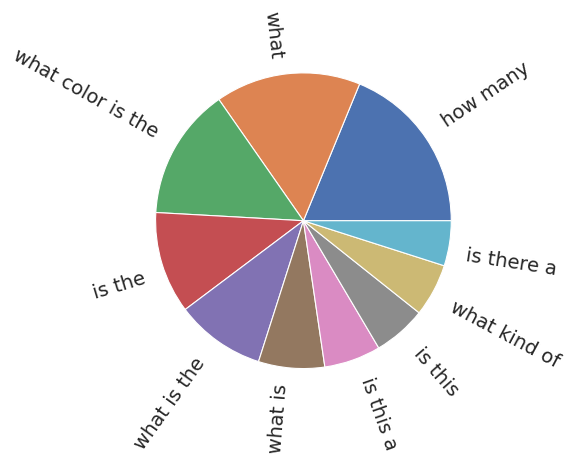

In [33]:
base_path = '../../../snap/vqa/lxr111_multilabel_full_run_3/'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/global_random/seed_965/budget_30.pkl'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.3.pkl'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.2.pkl'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.4.pkl'
sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/beta_pvals/seed_965/alpha_2_beta_1_budget_30.pkl'
plot_question_stems(base_path, sampling_ids)


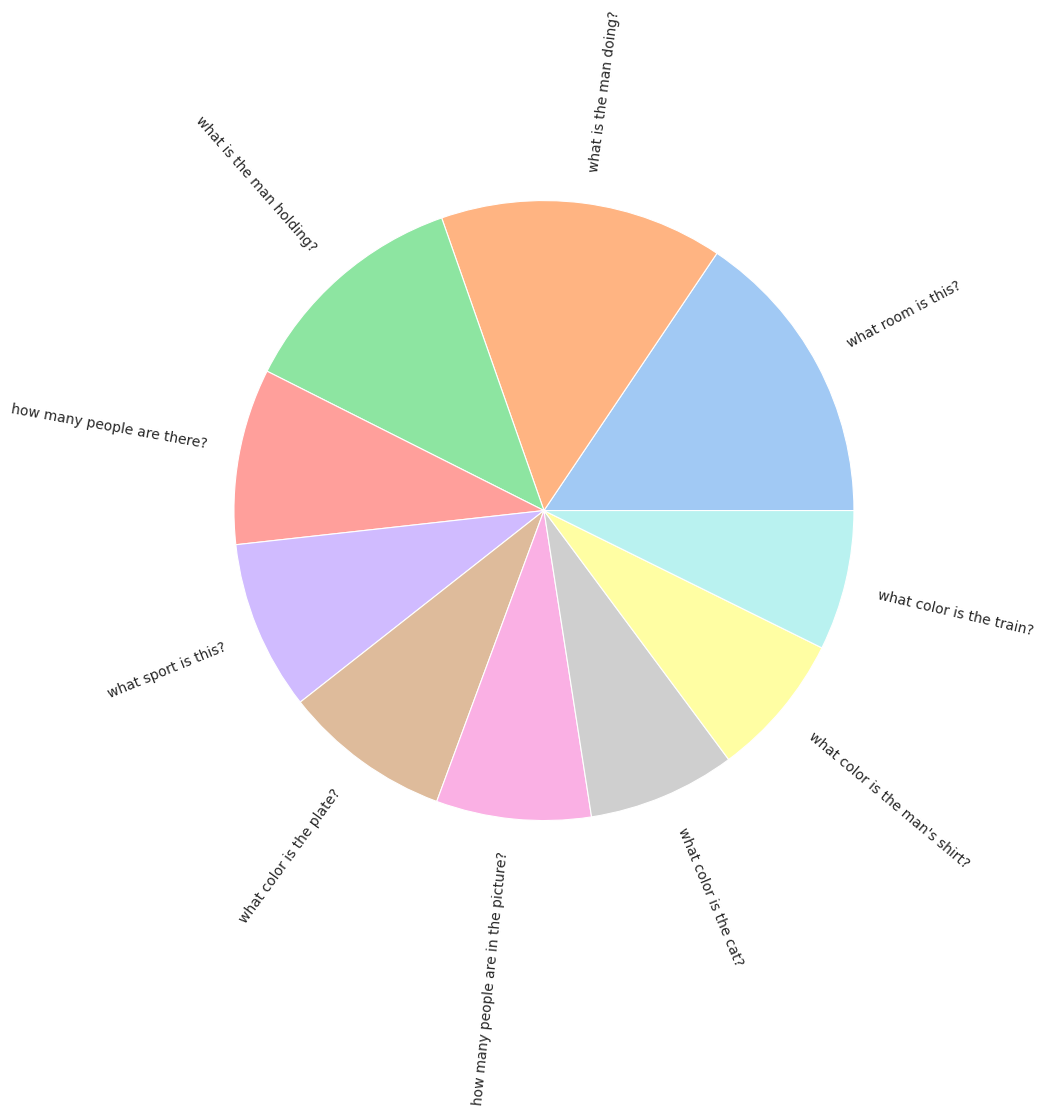

In [34]:
plot_full_questions(base_path, sampling_ids)

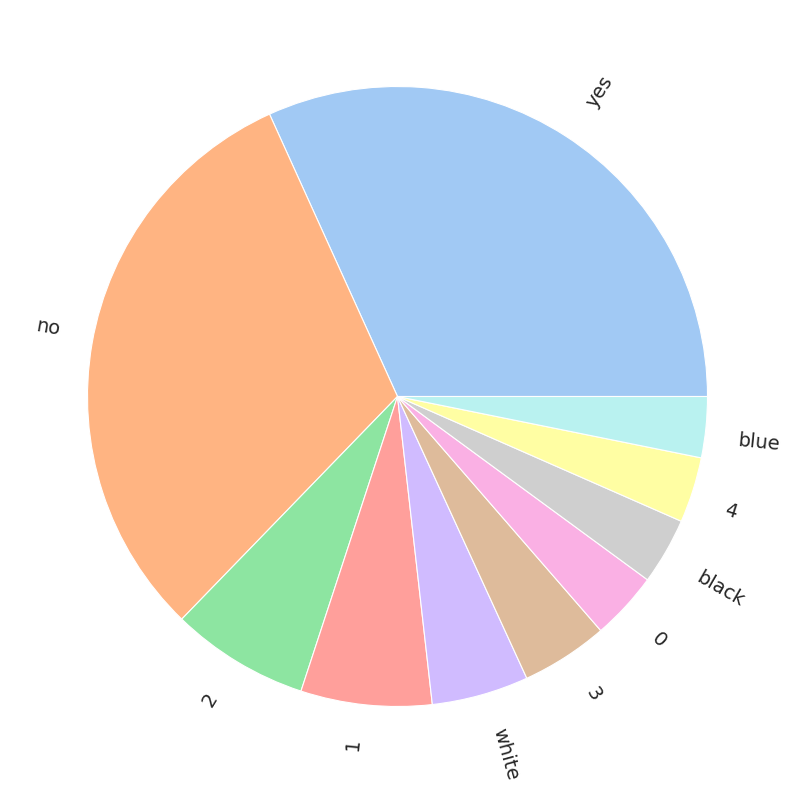

In [35]:
plot_targets(base_path, sampling_ids)

# Top Targets / Question Types in Buckets

In [37]:
def plot_question_stems(base_path, lower, upper):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    df = df.loc[(df['variability'] >= lower) & (df['variability'] < upper)]


    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)

    plt.pie(question_types_freq_list, labels=question_types_list, rotatelabels=True)



def plot_full_questions(base_path, lower, upper):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    df = df.loc[(df['variability'] >= lower) & (df['variability'] < upper)]

    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)


    question_counts = df['Question'].value_counts()
    palette_color = sns.color_palette('pastel')
    ax = question_counts[:10].plot(kind='pie', colors=palette_color, textprops={'fontsize': 10}, rotatelabels=True, figsize=(10, 20))
    ax.set(ylabel=None)

def plot_targets(base_path, lower, upper):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    df = df.loc[(df['variability'] >= lower) & (df['variability'] < upper)]



    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    targets = df['Target'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)

    all_targets = []
    for question, answer in question_answer_pairs.items():
        all_targets.extend(answer)

    df_target = pd.DataFrame(all_targets, columns=['targets'])
    question_counts = df_target['targets'].value_counts()
    palette_color = sns.color_palette('pastel')
    ax = question_counts[:10].plot(kind='pie', colors=palette_color, textprops={'fontsize': 14}, rotatelabels=True, figsize=(10, 20))
    ax.set(ylabel=None)


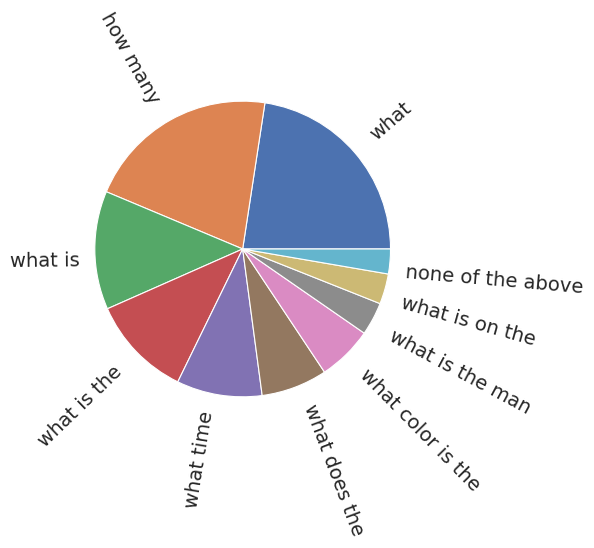

In [50]:
plot_question_stems(base_path, 0.4, 0.5)


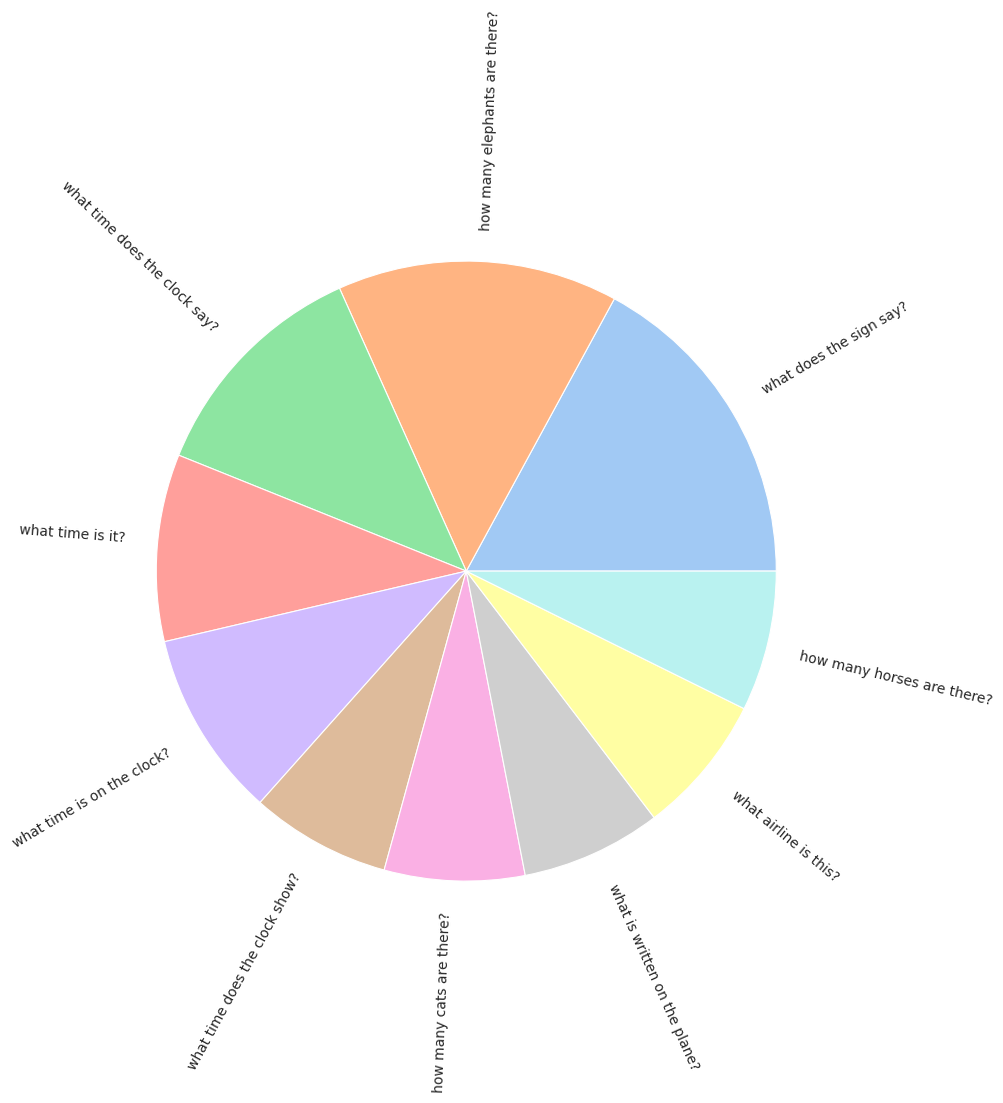

In [51]:
plot_full_questions(base_path, 0.4, 0.5)

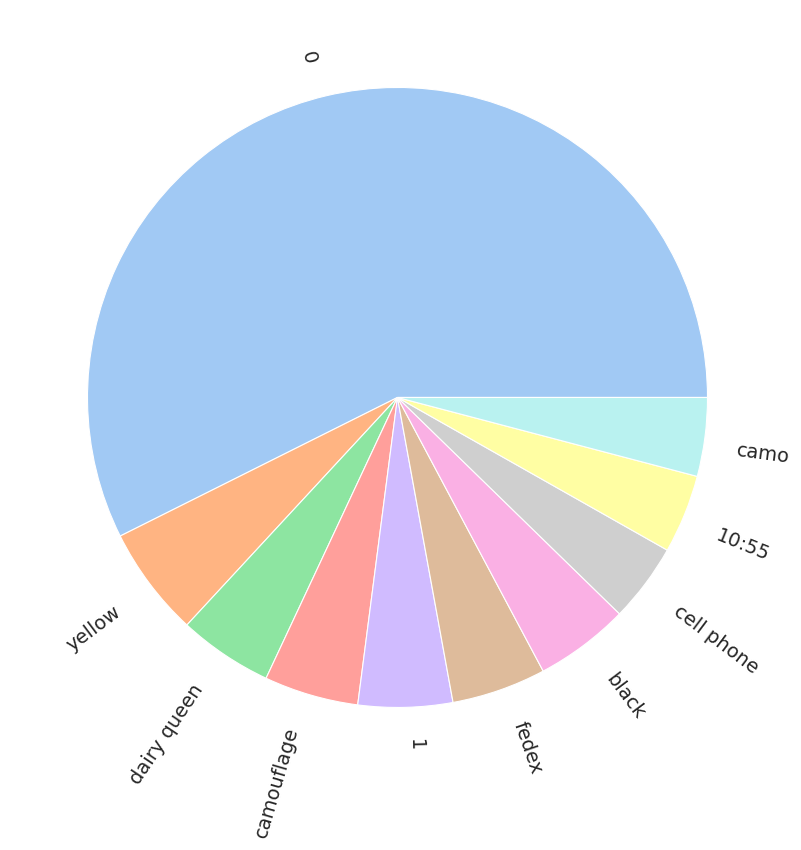

In [52]:
plot_targets(base_path, 0.4, 0.5)

In [53]:
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
region = 'hard'

if region == 'hard':
    # segment instances thresholded on confidence and variability to separate regions on datamap 
    df = df.loc[(df['confidence'] < 0.02) & (df['variability'] < 0.02)]
    print(df)
else:
    df = df.loc[(df['confidence'] > 0.4) &(df['confidence'] < 0.8) & (df['variability'] > 0.4)]
    print(df)

        confidence  variability  correctness  question_id  \
15443   0.003162    0.013095     0.0          575772006     
17048   0.006530    0.018569     0.0          487685006     
36146   0.008129    0.017210     0.0          403424013     
39179   0.012954    0.016716     0.0          268095003     
42237   0.005187    0.019145     0.0          503883000     
...          ...         ...     ...                ...     
618296  0.005336    0.009025     0.1          162282000     
618345  0.008338    0.007804     0.0          549168002     
618349  0.007795    0.004547     0.5          434828012     
619265  0.011135    0.019205     0.0          318401001     
619309  0.000255    0.000310     0.0          337153000     

                                                                       Predictions  \
15443   [nothing, cleaning, heat, water, 5:18, drink]                                
17048   [tile, carpet, ball, nothing, paper, rug, 5:18]                              
36146   [

In [100]:
import collections

def plot_model_preds(base_path, region):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    if region == 'hard':
        # segment instances thresholded on confidence and variability to separate regions on datamap 
        df = df.loc[(df['confidence'] < 0.02) & (df['variability'] < 0.02)]
    else:
        df = df.loc[(df['confidence'] > 0.4) &(df['confidence'] < 0.8) & (df['variability'] > 0.4)]


    questions = df['Question'].tolist()
    questions = [i[0].lower() for i in questions]
    df['Question'] = questions

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets

    preds = df['Predictions'].tolist()
    # preds = [i[0] for i in preds]
    # df['Predictions'] = preds
    # print(preds)
    # preds = df['Predictions'].tolist()

    with open("../../../data/vqa/mscoco_question_types.txt") as f:
        question_types_list = f.read().splitlines() 
    question_types_list = list(set(question_types_list))
    question_types_list = sorted(question_types_list, key=len) 
    question_types_list.reverse()

    question_types_freq = {}
    question_answer_pairs = {}
    question_types_full = {}

    for i in question_types_list:
        question_types_freq[i] = 0
        question_answer_pairs[i] = []
        question_types_full[i] = []



    for idx, question in enumerate(questions):
        counter = 0
        target_list = [x.strip() for x in targets[idx].split(',')]
        matches = []
        for question_type in question_types_freq:
            
            if question.startswith(question_type):
                matches.append(question_type)
        if len(matches) != 0:
            quest_type_max = max(matches, key=len)
            question_types_freq[quest_type_max] +=1
            question_answer_pairs[quest_type_max].extend(target_list)
            question_types_full[quest_type_max].extend(question)
            counter+=1
        if counter == 0:
            question_types_freq['none of the above'] +=1
            question_answer_pairs['none of the above'].extend(target_list)
            question_types_full['none of the above'].extend(question)

        
    res = sum(list(question_types_freq.values()))
    assert res == len(questions)
    question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    question_types_list = list(question_types_freq.keys())[:10]
    question_types_freq_list = list(question_types_freq.values())[:10]
    data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    question_freqs = pd.DataFrame.from_dict(data)

    all_targets = []
    for question, answer in question_answer_pairs.items():
        all_targets.extend(answer)

    df_target = pd.DataFrame(all_targets, columns=['targets'])
    target_counts = df_target['targets'].value_counts()
    # palette_color = sns.color_palette('pastel')
    # ax = target_counts[:10].plot(kind='pie', colors=palette_color, textprops={'fontsize': 14}, rotatelabels=True, figsize=(10, 20))
    # ax.set(ylabel=None)

    top_targets = target_counts[:4]
    print(top_targets)
    #top_targets = ["can't tell", "not sure", "don't know", "unknown"]
    top_targets = ["0", "yellow", "camouflage", "dairy queen"]
    model_preds ={}
    for top in top_targets:
        model_preds[top] = []

    for idx, question in enumerate(questions):
        target_list = [x.strip() for x in targets[idx].split(',')]
        for top_target in top_targets:
            if top_target in target_list:
                model_preds[top_target].extend(preds[idx])
    print(model_preds)

    frequency = dict(collections.Counter(model_preds["dairy queen"]))
    sorted_freq = dict(sorted(frequency.items(), key=lambda x:x[1], reverse=True))

    plt.pie(list(sorted_freq.values())[:20], labels=list(sorted_freq.keys())[:20], rotatelabels=True)




0              70
yellow         7 
camouflage     6 
dairy queen    6 
Name: targets, dtype: int64
{'0': ['comfort', '2', '0', '1', '2', '0', 'no', '1', '2', '0', 'no', '1', '2', '3', '0', 'no', '0', 'no', '1', '2', '0', 'yes', '0', 'yes', '1', '2', '0', 'no', '1', '2', '0', '4', '1', '0', '1', '2', '3', '0', '4', '2', '0', '1', '2', '3', '0', '1', '2', '0', '1', '2', '3', '0', '4', '2', '0', '1', '2', '4', '7', '8', '6', '0', '5', '2', '0', '2', '0', '1', '0', '1', '0', '1', '0', '1', '2', '1', '6', '0', '3', '2', '4', '8', '9', '6', '0', '2', '0', '1', '2', '3', '0', '2', '3', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '3', '0', '13', '20', '1', '15', '6', '0', '10', '2', '16', '13', '20', '7', '8', '6', '0', '3', '2', '0', '1', '0', '1', '2', '0', '4', '1', '0', '1', '2', '0', '1', '2', '0', '2', '0', '1', '2', '3', '0', '2', '0', '1', '2', '0', '1', '0', '1', '0', '1', '2', '0', '1', '2', '4', '1', '0', '3', '2', '0', '1', '2', '3', '0', '4', '0', '1', '2', '0', '

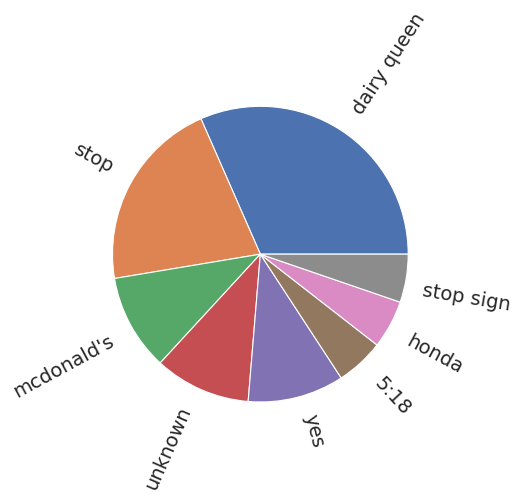

In [101]:
plot_model_preds(base_path, 'ambiguous')

# Variability and Confidence Histograms

In [3]:
# base_path = '../../../snap/vqa/lxr111_multilabel_full_run_3/'
# #sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/global_random/seed_965/budget_30.pkl'
# sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.2.pkl'
# #sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.4.pkl'
# #sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/beta_pvals/seed_965/alpha_2_beta_1_budget_30.pkl'
def variability_histogram(base_path, sampling_ids, title):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    with open(sampling_ids, 'rb') as f:
        sampled_ids = pickle.load(f)
    df_sampled = df.loc[df['question_id'].isin(sampled_ids)]
    sns.histplot(df['variability'].tolist(), kde=True).set(title=title)
    sns.histplot(data=df_sampled, x='variability', kde=True, color='red')
    plt.show()


def confidence_histogram(base_path, sampling_ids, title):
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    with open(sampling_ids, 'rb') as f:
        sampled_ids = pickle.load(f)
    df_sampled = df.loc[df['question_id'].isin(sampled_ids)]
    sns.histplot(df['confidence'].tolist(), kde=True).set(title=title)
    sns.histplot(data=df_sampled, x='confidence', kde=True, color='red')
    plt.show()

# Stats per sample and Targets Excluded

In [19]:


def check_target_bin(df, targets, idx):
    # returns true if target is in dataframe 
    sampled_targets_unique =[] # unique targets in vqa dataset 
    targets_list_sampled = np.array(df['targets'].tolist())
    for i in targets_list_sampled:
        target_list = [x.strip() for x in i.split(',')]
        sampled_targets_unique.extend(target_list)
    unique_targets_sampled = set(sampled_targets_unique)

    for i in targets:
        if i in unique_targets_sampled:
            print("BIN: ", str(idx+1), ": target: ", i)

def unique_targets(df):
    targets_list = np.array(df['Target'].tolist())

    targets_multilabel =[] # unique targets in sample
    for i in targets_list:
        target_list = [x.strip() for x in i.split(',')]
        targets_multilabel.extend(target_list)
    unique_targets = set(targets_multilabel)

    return unique_targets

def bins_variability(df):
    targets_list = np.array(df['Target'].tolist())
    question_ids = np.array(df['question_id'].to_list())
    variability = np.array(df['variability'].tolist())
    df_variability = pd.DataFrame({'variability':variability, 'question_id':question_ids, 'targets':targets_list})
    bins = pd.cut(variability, bins=np.linspace(0, 0.5, 6), right=True, retbins=True)
    df_variability['bins'] = bins[0]

    unique_bins = df_variability['bins'].unique().tolist()
    print(unique_bins)

    first_bin = df_variability.loc[df_variability['bins'] == unique_bins[2]]
    second_bin = df_variability.loc[df_variability['bins'] == unique_bins[0]]
    third_bin = df_variability.loc[df_variability['bins'] == unique_bins[1]]
    fourth_bin = df_variability.loc[df_variability['bins'] == unique_bins[3]]
    fifth_bin = df_variability.loc[df_variability['bins'] == unique_bins[4]]
    all_bins = [first_bin, second_bin, third_bin, fourth_bin, fifth_bin]

    return all_bins

def bins_confidence(df):
    question_ids = np.array(df['question_id'].to_list())
    confidence = np.array(df['confidence'].tolist())

    df_confidence = pd.DataFrame({'confidence':confidence, 'question_id':question_ids})
    bins = pd.cut(confidence, bins=np.linspace(0, 1.0, 6), right=True, retbins=True)
    df_confidence['bins'] = bins[0]
    unique_bins = df_confidence['bins'].unique().tolist()
    print(unique_bins)

    first_bin = df_confidence.loc[df_confidence['bins'] == unique_bins[0]]
    second_bin = df_confidence.loc[df_confidence['bins'] == unique_bins[1]]
    third_bin = df_confidence.loc[df_confidence['bins'] == unique_bins[2]]
    fourth_bin = df_confidence.loc[df_confidence['bins'] == unique_bins[4]]
    fifth_bin = df_confidence.loc[df_confidence['bins'] == unique_bins[3]]
    all_bins = [first_bin, second_bin, third_bin, fourth_bin, fifth_bin]

    return all_bins

def sample_stats(base_path, sampling_ids):
    # returns sample size, number of targets excluded, which targets were excluded, and which variability bin those targets belong to
    df = pd.read_pickle(base_path+"datamap_metrics.pkl")
    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets

    bins_variability_orig = bins_variability(df)

    with open(sampling_ids, 'rb') as f:
        sampled_ids = pickle.load(f)
    df_sampled = df.loc[df['question_id'].isin(sampled_ids)]
    unique_targets_sampled = unique_targets(df_sampled)
    unique_targets_orig = unique_targets(df)
    targets_excluded = unique_targets_orig - unique_targets_sampled

    for idx, bin in enumerate(bins_variability_orig):
        check_target_bin(bin, targets_excluded, idx)




    print("Sample size: ", len(df_sampled))
    print("Number of targets excluded: ", len(unique_targets_orig) - len(unique_targets_sampled))
    print("Targets excluded: ", targets_excluded)





In [ ]:
sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/beta_pvals_conf/seed_965/alpha_2_beta_8_budget_30.pkl'
sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/normal_near_mode_variability/seed_965/middle_buckets_0.1_0.5.pkl'
sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/random_near_mode_confidence/seed_965/middle_buckets_0.4_1.0.pkl'


In [77]:
base_path = '../../../snap/vqa/lxr111_multilabel_full_run_3/'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/global_random/seed_965/budget_30.pkl'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/alpha_2_beta_2_budget_30mod.pkl'

# sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/beta_pvals_conf/seed_965/alpha_2_beta_8_budget_30.pkl'
#sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/normal_near_mode_variability/seed_965/middle_buckets_0.1_0.5.pkl'
sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/random_near_mode_confidence/seed_965/middle_buckets_0.8_1.0.pkl'
title = 'Random-Near-Mode-0.8-1.0-confidence'

# sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.2.pkl'
# #sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/var_stratified/seed_965/middle_buckets_0.1_0.4.pkl'
# #sampling_ids = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/beta/beta_pvals/seed_965/alpha_2_beta_1_budget_30.pkl'


In [78]:
sample_stats(base_path, sampling_ids)

[Interval(0.1, 0.2, closed='right'), Interval(0.2, 0.3, closed='right'), Interval(0.0, 0.1, closed='right'), Interval(0.3, 0.4, closed='right'), Interval(0.4, 0.5, closed='right')]
BIN:  1 : target:  boundaries
BIN:  1 : target:  weather vane
BIN:  1 : target:  someone
BIN:  1 : target:  2 feet
BIN:  1 : target:  against wall
BIN:  1 : target:  mitsubishi
BIN:  1 : target:  napkin
BIN:  1 : target:  theater
BIN:  1 : target:  1:40
BIN:  1 : target:  tattoos
BIN:  1 : target:  mets
BIN:  1 : target:  51
BIN:  1 : target:  athletics
BIN:  1 : target:  mercedes benz
BIN:  1 : target:  4:20
BIN:  1 : target:  behind bench
BIN:  1 : target:  shark
BIN:  1 : target:  dump
BIN:  1 : target:  yogurt
BIN:  1 : target:  on his head
BIN:  1 : target:  100 feet
BIN:  1 : target:  porch
BIN:  1 : target:  ketchup and mustard
BIN:  1 : target:  monday
BIN:  1 : target:  philadelphia
BIN:  1 : target:  uniforms
BIN:  1 : target:  12:15
BIN:  1 : target:  lexus
BIN:  1 : target:  recliner
BIN:  1 : ta

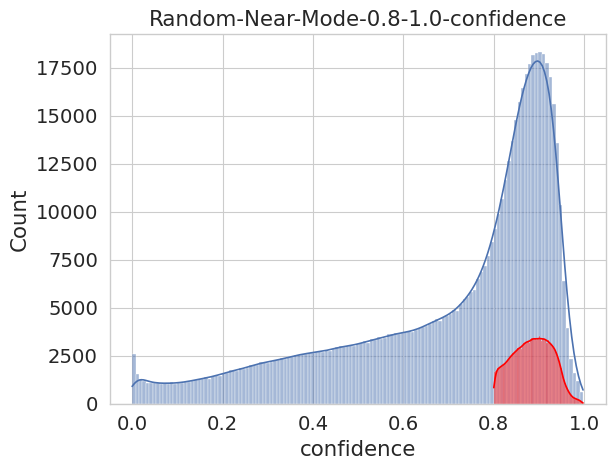

In [79]:
confidence_histogram(base_path, sampling_ids, title)

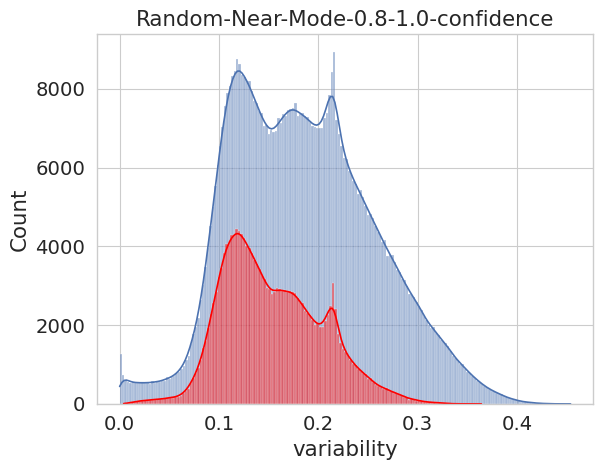

In [80]:
variability_histogram(base_path, sampling_ids, title)